In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os

In [ ]:
Img_size=[224,224]
train_path='/content/drive/MyDrive/Colab/train'
test_path='/content/drive/MyDrive/Colab/Test'

In [ ]:
vgg=VGG16(input_shape=Img_size + [3],weights='imagenet',include_top=False)

for layer in vgg.layers:
  layer.trainable = False

x=Flatten()(vgg.output)
folder=glob('/content/drive/MyDrive/Colab/train/*')
num_classes = len(folder)
prediction =Dense(num_classes,activation='softmax')(x)

model =Model(inputs=vgg.input,outputs=prediction)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(224,224),
                                                 batch_size=16,
                                                 class_mode='categorical')
valid_set=valid_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=16,
                                            class_mode='categorical')

Found 19 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [ ]:
train=training_set.samples
train

19

In [ ]:
r=model.fit(training_set,validation_data=valid_set,epochs=5,steps_per_epoch=len(training_set),
            validation_steps=len(valid_set))

Epoch 1/5
2/2 [==============================] - 36s 31s/step - loss: 3.2513 - accuracy: 0.4737 - val_loss: 1.4019 - val_accuracy: 0.6667
Epoch 2/5
2/2 [==============================] - 22s 13s/step - loss: 1.8067 - accuracy: 0.5263 - val_loss: 1.1797 - val_accuracy: 0.3333
Epoch 3/5
2/2 [==============================] - 20s 9s/step - loss: 1.2195 - accuracy: 0.5263 - val_loss: 1.8510 - val_accuracy: 0.3333
Epoch 4/5
2/2 [==============================] - 22s 11s/step - loss: 1.2678 - accuracy: 0.5263 - val_loss: 0.2713 - val_accuracy: 0.9167
Epoch 5/5
2/2 [==============================] - 19s 17s/step - loss: 0.3294 - accuracy: 0.7895 - val_loss: 0.1917 - val_accuracy: 0.9167


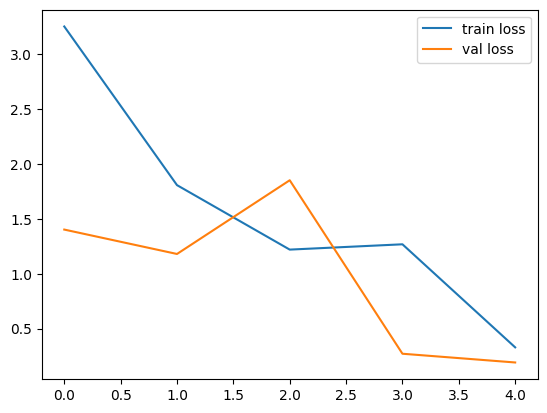

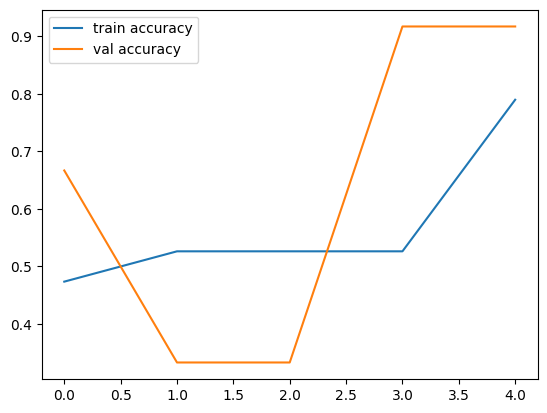

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()


In [ ]:
class_names = list(training_set.class_indices.keys())
print("Class labels:", class_names)


Class labels: ['Noob', 'Pro']


In [ ]:
import tensorflow as tf

from keras.models import load_model

In [ ]:
model.save('Colab Notebooksfacefeatures_new_model.h5')

AttributeError: 'function' object has no attribute 'save'

Found 19 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


Epoch 1/5
1/1 [==============================] - 25s 25s/step - loss: 0.7428 - accuracy: 0.5263 - val_loss: 9.1741 - val_accuracy: 0.3333
Epoch 2/5
1/1 [==============================] - 20s 20s/step - loss: 6.4689 - accuracy: 0.4737 - val_loss: 0.2776 - val_accuracy: 0.8333
Epoch 3/5
1/1 [==============================] - 21s 21s/step - loss: 0.5960 - accuracy: 0.5789 - val_loss: 0.4168 - val_accuracy: 0.8333
Epoch 4/5
1/1 [==============================] - 21s 21s/step - loss: 0.2690 - accuracy: 0.9474 - val_loss: 0.3143 - val_accuracy: 0.8333
Epoch 5/5
1/1 [==============================] - 21s 21s/step - loss: 0.1107 - accuracy: 1.0000 - val_loss: 0.1558 - val_accuracy: 1.0000


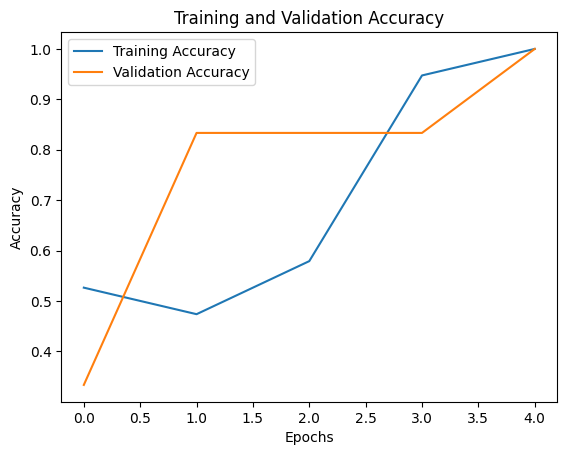

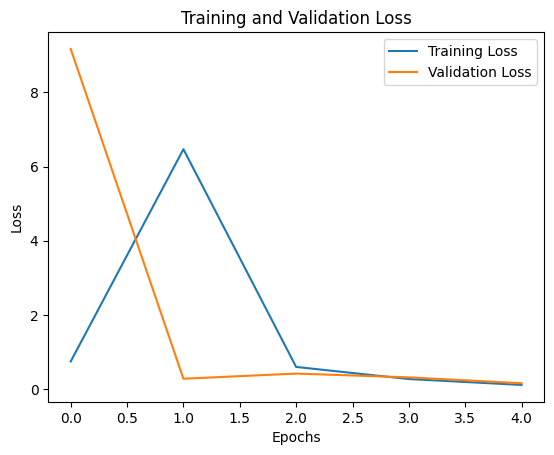

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.optimizers import Adam

# Set the paths for the training and validation data
train_path = '/content/drive/MyDrive/Colab/train'

valid_path = '/content/drive/MyDrive/Colab/Test'

# Define image size and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation and preprocessing for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Preprocessing for the validation set (only rescaling)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented data for training and validation
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom fully connected layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=valid_generator,
    validation_steps=len(valid_generator)
)

# Plot training and validation accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the model to disk
model.save('vgg16_transfer_learning_model.h5')


In [ ]:
from keras.models import load_model
import numpy as np

# Load the trained model
model

# Assuming 'test_images' is a list of paths to test images
test_images = ['/content/drive/MyDrive/Colab/train/Noob/WhatsApp Image 2024-05-31 at 16.21.38_46c8c8ea.jpg', '/content/drive/MyDrive/Colab/train/Noob/WhatsApp Image 2024-05-31 at 16.21.39_e8526cc7.jpg', '/content/drive/MyDrive/Colab/train/Pro/WhatsApp Image 2024-05-31 at 16.39.05_920d31bb.jpg','/content/drive/MyDrive/Colab/train/Pro/WhatsApp Image 2024-05-31 at 16.39.57_f96d669c.jpg']

# Define function to preprocess image
def preprocess_image(image_path):
    # Preprocess image as needed
    img = image.load_img(image_path, target_size=(224, 224))  # Resize image
    img = image.img_to_array(img)  # Convert image to numpy array
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Rescale pixel values
    return img


# Assuming 'class_names' is a list of class labels


# Preprocess test images and make predictions
for image_path in test_images:
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    predicted_class = class_names[np.argmax(prediction)]
    print(f"Predicted class for {image_path}: {predicted_class}")


1/1 [==============================] - 1s 556ms/step
Predicted class for /content/drive/MyDrive/Colab/train/Noob/WhatsApp Image 2024-05-31 at 16.21.38_46c8c8ea.jpg: Noob
1/1 [==============================] - 1s 547ms/step
Predicted class for /content/drive/MyDrive/Colab/train/Noob/WhatsApp Image 2024-05-31 at 16.21.39_e8526cc7.jpg: Noob
1/1 [==============================] - 1s 565ms/step
Predicted class for /content/drive/MyDrive/Colab/train/Pro/WhatsApp Image 2024-05-31 at 16.39.05_920d31bb.jpg: Pro
1/1 [==============================] - 1s 592ms/step
Predicted class for /content/drive/MyDrive/Colab/train/Pro/WhatsApp Image 2024-05-31 at 16.39.57_f96d669c.jpg: Pro


In [ ]:
# Load the trained model


# Prepare test images (assuming 'test_images' is a list of paths to test images)
test_images = ['/content/drive/MyDrive/Colab/train/Noob/WhatsApp Image 2024-05-31 at 16.21.38_46c8c8ea.jpg', '/content/drive/MyDrive/Colab/train/Noob/WhatsApp Image 2024-05-31 at 16.21.39_e8526cc7.jpg', '/content/drive/MyDrive/Colab/train/Pro/WhatsApp Image 2024-05-31 at 16.39.05_920d31bb.jpg','/content/drive/MyDrive/Colab/train/Pro/WhatsApp Image 2024-05-31 at 16.39.57_f96d669c.jpg']

# Preprocess test images
from keras.preprocessing import image
import numpy as np

# Define function to preprocess image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize image
    img = image.img_to_array(img)  # Convert image to numpy array
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Rescale pixel values
    return img

# Make predictions
for image_path in test_images:
    # Preprocess image
    img = preprocess_image(image_path)

    # Make prediction
    prediction = r.predict(img)

    # Convert prediction to human-readable label (assuming 'class_names' is a list of class labels)
    predicted_class = class_names[np.argmax(prediction)]

    # Display result
    print(f"Predicted class for {image_path}: {predicted_class}")


AttributeError: 'History' object has no attribute 'predict'

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.optimizers import Adam

In [ ]:
train_path=''
test_path=''

In [ ]:
image_size=[224,224]


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=45,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 horizontal_flip=True,
                                 zoom_range=0.2,
                                 fill_mode='constant',cval=125)
valid_datagen=ImageDataGenerator(rescale=1./255)


In [ ]:
train_data=train_datagen.flow_from_directory(
    train_path,batch_size=32,target_size=image_size
    ,class_mode='categorical'
)
valid_data=valid_datagen.flow_from_directory(valid_path,target_size=image_size,
                                             batch_size=32,class_mode='categorical'
                                             )


NameError: name 'train_path' is not defined

In [ ]:
base_model=VGG16(weights='imagenet',include_top=False,input_shape=[224,224,3])
for layer in base_model.layers:
  layer.trainable=False

x=Flatten()(base_model.output)
x=Dense(256,activation='relu')(x)
x=Dense(256,activation='relu')(x)
output=Dense(len(train_datagen.class_indices),activation='softmax')(x)

model=Model(inputs=base_model,outputs=output)
model.compile(optimizer=-'Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_datagen,steps_per_epochs=len(train_datagen),
                  epochs=5,
                  )

In [ ]:
class_name=list(train_datagen.class_indices.key())

In [ ]:
def preprocess_image(img_path):
  img=image.load_img(img_path,target_size=Image_size)
  img=image.img_to_arr(img)
  img=img.expand_dims(img,axis=0)
  return img

test_dir=""

test_images=os.listdir(test_dir)

for image in test_images:
  img_path=os.join(test_dir,image)
  img=preprocess_image(img_path)
  prediction=model.predict(img)
  prediction_class = class_name[np.argmax(prediction)]

